## Project 1: Regression (Website traffic)

### Imports

In [2]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

### Load data + explore

In [3]:
df = pd.read_csv('../../Data/website_data.csv')

In [4]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [5]:
df.shape

(2000, 7)

In [6]:
df.describe

<bound method NDFrame.describe of       Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0              5         11.051381     0.230652        Organic      3.890460   
1              4          3.429316     0.391001         Social      8.478174   
2              4          1.621052     0.397986        Organic      9.636170   
3              5          3.629279     0.180458        Organic      2.071925   
4              5          4.235843     0.291541           Paid      1.960654   
...          ...               ...          ...            ...           ...   
1995           1          2.724513     0.207187       Referral      1.324206   
1996           3          0.392856     0.095559        Organic      3.824416   
1997           4          9.899823     0.446622        Organic      1.288675   
1998           3          0.393319     0.278340           Paid      5.037584   
1999           3          0.882638     0.338026         Direct      5.186908   

     

In [7]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [8]:
df.isna().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

### Encode categorical variable(s)

In [9]:
encoder = OneHotEncoder(sparse_output=False)

# One-hot encode the 'Traffic Source' column
one_hot_encoded = encoder.fit_transform(df[['Traffic Source']])

# Create a DataFrame with the one-hot encoded columns
# Pass the column name (in a list) instead of the actual data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Traffic Source']))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical column
df_encoded = df_encoded.drop(['Traffic Source'], axis=1)

In [10]:
df_encoded.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page',
       'Previous Visits', 'Conversion Rate', 'Traffic Source_Direct',
       'Traffic Source_Organic', 'Traffic Source_Paid',
       'Traffic Source_Referral', 'Traffic Source_Social'],
      dtype='object')

### Define target variable + split data

In [11]:
X = df_encoded[['Page Views', 'Bounce Rate','Traffic Source_Direct',
       'Traffic Source_Organic', 'Traffic Source_Paid',
       'Traffic Source_Referral', 'Traffic Source_Social',
       'Conversion Rate', 'Previous Visits', 'Session Duration']]
y = df_encoded[['Time on Page']]

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [13]:
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 1400
Test data amount: 300
Validation data amount: 300


In [14]:
variable_amount = len(X.columns)

### Neural Network

In [15]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(10,)),
        layers.Dense(12, activation="relu",kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')

model.summary()

C:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397 (1.55 KB)

 Trainable params: 377 (1.47 KB)

 Non-trainable params: 20 (80.00 B)

In [16]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30.5296 - val_loss: 24.0857
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8489 - val_loss: 17.9872
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3992 - val_loss: 12.8331
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5293 - val_loss: 10.7527
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2847 - val_loss: 10.0359
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2359 - val_loss: 9.6269
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5030 - val_loss: 9.3100
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2564 - val_loss: 9.0553
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4992 - val_loss: 8.8474
Epoch 10/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8231 - val_loss: 8.6554
Epoch 11/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3231 - val_loss: 8.5051
Epoch 12/1000
44/44 ━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7125 - val_loss: 6.4867
Epoch 69/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0618 - val_loss: 6.5036
Epoch 70/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5622 - val_loss: 6.4683
Epoch 71/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7195 - val_loss: 6.4569
Epoch 72/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5251 - val_loss: 6.4398
Epoch 73/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4386 - val_loss: 6.4270
Epoch 74/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3729 - val_loss: 6.4445
Epoch 75/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7426 - val_loss: 6.4272
Epoch 76/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9400 - val_loss: 6.4524
Epoch 77/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1906 - val_loss: 6.4010
Epoch 78/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0283 - val_loss: 6.3952
Epoch 79/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2075 - val_loss: 6.3146
Epoch 136/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4826 - val_loss: 6.3057
Epoch 137/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7697 - val_loss: 6.2992
Epoch 138/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2503 - val_loss: 6.3244
Epoch 139/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5605 - val_loss: 6.3202
Epoch 140/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0056 - val_loss: 6.3232
Epoch 141/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8362 - val_loss: 6.2974
Epoch 142/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9439 - val_loss: 6.3077
Epoch 143/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0286 - val_loss: 6.3159
Epoch 144/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2565 - val_loss: 6.2996
Epoch 145/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6596 - val_loss: 6.3111
Epoch 146/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3008 - val_loss: 6.3145
Epoch 203/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2999 - val_loss: 6.2952
Epoch 204/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4933 - val_loss: 6.2735
Epoch 205/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5649 - val_loss: 6.3068
Epoch 206/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6776 - val_loss: 6.3161
Epoch 207/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9328 - val_loss: 6.2828
Epoch 208/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9084 - val_loss: 6.2835
Epoch 209/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7538 - val_loss: 6.2849
Epoch 210/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4762 - val_loss: 6.2957
Epoch 211/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8770 - val_loss: 6.2744
Epoch 212/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2110 - val_loss: 6.2813
Epoch 213/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0109 - val_loss: 6.2521
Epoch 270/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7119 - val_loss: 6.2547
Epoch 271/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4080 - val_loss: 6.2442
Epoch 272/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7827 - val_loss: 6.2687
Epoch 273/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7153 - val_loss: 6.2620
Epoch 274/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7282 - val_loss: 6.2570
Epoch 275/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6446 - val_loss: 6.2780
Epoch 276/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2324 - val_loss: 6.2583
Epoch 277/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1993 - val_loss: 6.2710
Epoch 278/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9069 - val_loss: 6.2517
Epoch 279/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7854 - val_loss: 6.2600
Epoch 280/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9496 - val_loss: 6.2427
Epoch 337/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0354 - val_loss: 6.2482
Epoch 338/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7783 - val_loss: 6.2516
Epoch 339/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0115 - val_loss: 6.2567
Epoch 340/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1864 - val_loss: 6.2528
Epoch 341/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5543 - val_loss: 6.2468
Epoch 342/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8735 - val_loss: 6.2645
Epoch 343/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1147 - val_loss: 6.2333
Epoch 344/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9935 - val_loss: 6.2431
Epoch 345/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4063 - val_loss: 6.2364
Epoch 346/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7178 - val_loss: 6.2325
Epoch 347/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0283 - val_loss: 6.2299
Epoch 404/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2623 - val_loss: 6.2428
Epoch 405/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9979 - val_loss: 6.2392
Epoch 406/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8915 - val_loss: 6.2226
Epoch 407/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3868 - val_loss: 6.2460
Epoch 408/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7656 - val_loss: 6.2466
Epoch 409/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7071 - val_loss: 6.2487
Epoch 410/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2618 - val_loss: 6.2417
Epoch 411/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7255 - val_loss: 6.2602
Epoch 412/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5356 - val_loss: 6.2493
Epoch 413/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2905 - val_loss: 6.2610
Epoch 414/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8665 - val_loss: 6.2234
Epoch 471/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4773 - val_loss: 6.2442
Epoch 472/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9258 - val_loss: 6.2497
Epoch 473/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3908 - val_loss: 6.2458
Epoch 474/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0317 - val_loss: 6.2311
Epoch 475/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4988 - val_loss: 6.2364
Epoch 476/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0401 - val_loss: 6.2234
Epoch 477/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6170 - val_loss: 6.2390
Epoch 478/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0029 - val_loss: 6.2583
Epoch 479/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1624 - val_loss: 6.2428
Epoch 480/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7923 - val_loss: 6.2404
Epoch 481/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1779 - val_loss: 6.2542
Epoch 538/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7695 - val_loss: 6.2449
Epoch 539/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0281 - val_loss: 6.2156
Epoch 540/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3635 - val_loss: 6.2366
Epoch 541/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6792 - val_loss: 6.2208
Epoch 542/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7959 - val_loss: 6.2208
Epoch 543/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0941 - val_loss: 6.2232
Epoch 544/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6833 - val_loss: 6.2379
Epoch 545/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2686 - val_loss: 6.2208
Epoch 546/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4816 - val_loss: 6.2136
Epoch 547/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1234 - val_loss: 6.2111
Epoch 548/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2220 - val_loss: 6.2433
Epoch 605/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1681 - val_loss: 6.2204
Epoch 606/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8049 - val_loss: 6.2217
Epoch 607/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5135 - val_loss: 6.2013
Epoch 608/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7696 - val_loss: 6.2187
Epoch 609/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9103 - val_loss: 6.2117
Epoch 610/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5867 - val_loss: 6.2214
Epoch 611/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5543 - val_loss: 6.2102
Epoch 612/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0440 - val_loss: 6.2290
Epoch 613/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0703 - val_loss: 6.2279
Epoch 614/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3324 - val_loss: 6.2299
Epoch 615/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3994 - val_loss: 6.2206
Epoch 672/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1761 - val_loss: 6.2175
Epoch 673/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5891 - val_loss: 6.2216
Epoch 674/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7587 - val_loss: 6.2142
Epoch 675/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8415 - val_loss: 6.2189
Epoch 676/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4308 - val_loss: 6.2014
Epoch 677/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8733 - val_loss: 6.2142
Epoch 678/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4626 - val_loss: 6.1953
Epoch 679/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6459 - val_loss: 6.2025
Epoch 680/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2952 - val_loss: 6.1973
Epoch 681/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7466 - val_loss: 6.2255
Epoch 682/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8250 - val_loss: 6.2104
Epoch 739/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2229 - val_loss: 6.2027
Epoch 740/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9196 - val_loss: 6.1959
Epoch 741/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5339 - val_loss: 6.2278
Epoch 742/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9044 - val_loss: 6.2160
Epoch 743/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0207 - val_loss: 6.2167
Epoch 744/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1736 - val_loss: 6.2094
Epoch 745/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3320 - val_loss: 6.2140
Epoch 746/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7064 - val_loss: 6.1868
Epoch 747/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4420 - val_loss: 6.2134
Epoch 748/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5271 - val_loss: 6.1822
Epoch 749/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5344 - val_loss: 6.2018
Epoch 806/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3039 - val_loss: 6.2565
Epoch 807/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5242 - val_loss: 6.1922
Epoch 808/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3174 - val_loss: 6.1942
Epoch 809/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2771 - val_loss: 6.1859
Epoch 810/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0738 - val_loss: 6.2057
Epoch 811/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5633 - val_loss: 6.2237
Epoch 812/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0819 - val_loss: 6.1967
Epoch 813/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9899 - val_loss: 6.2070
Epoch 814/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8474 - val_loss: 6.1947
Epoch 815/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9838 - val_loss: 6.1866
Epoch 816/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6437 - val_loss: 6.1857
Epoch 873/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7460 - val_loss: 6.1794
Epoch 874/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8106 - val_loss: 6.1826
Epoch 875/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8848 - val_loss: 6.1774
Epoch 876/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4671 - val_loss: 6.2020
Epoch 877/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9311 - val_loss: 6.1910
Epoch 878/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2681 - val_loss: 6.2033
Epoch 879/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6722 - val_loss: 6.2209
Epoch 880/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6161 - val_loss: 6.2080
Epoch 881/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4661 - val_loss: 6.2111
Epoch 882/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4779 - val_loss: 6.2113
Epoch 883/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7277 - val_loss: 6.2005
Epoch 940/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9491 - val_loss: 6.1910
Epoch 941/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0747 - val_loss: 6.1883
Epoch 942/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8805 - val_loss: 6.1992
Epoch 943/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1712 - val_loss: 6.1864
Epoch 944/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2021 - val_loss: 6.1966
Epoch 945/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9783 - val_loss: 6.1980
Epoch 946/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7206 - val_loss: 6.2073
Epoch 947/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5671 - val_loss: 6.2214
Epoch 948/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3594 - val_loss: 6.1979
Epoch 949/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1582 - val_loss: 6.2089
Epoch 950/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

<AxesSubplot:>

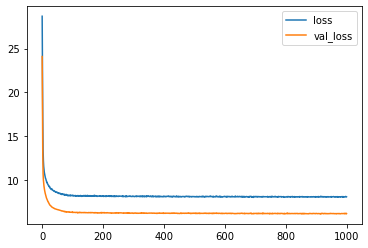

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [18]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
7.559747695922852

Train data evaluation:
8.073375701904297


In [19]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Test True Y,Model Predictions
0,1.163765,1.802109
1,3.437920,4.571538
2,8.782301,4.279771
3,3.890301,4.506716
4,0.876334,4.102716
...,...,...
295,6.408842,4.094180
296,2.999242,4.415096
297,1.497355,4.459403
298,2.550217,3.709180


In [20]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "seconds")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "seconds^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "seconds")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
2.1 seconds

MSE
7.53 seconds^2

RMSE:
2.74 seconds

R-squared:
0.09

Explained variance score:
0.09


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

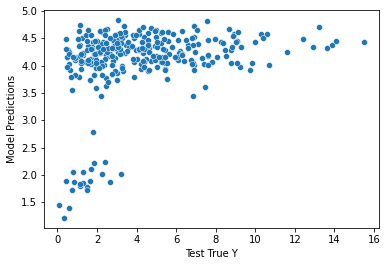

In [21]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

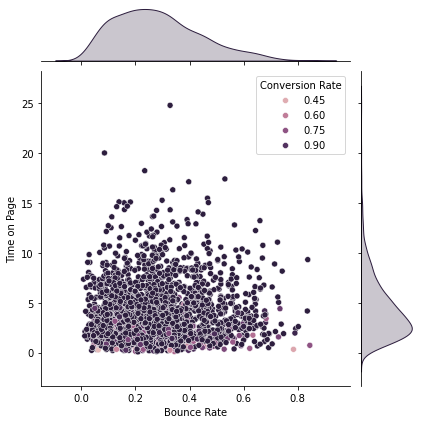

In [23]:
sns.jointplot(data=df_encoded, x="Bounce Rate", y="Time on Page", hue="Conversion Rate")

As we see the metrics are as far from good as they can be. Let's try another approach.

### NN Model, try 2

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(10,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,497 (13.66 KB)

 Trainable params: 3,477 (13.58 KB)

 Non-trainable params: 20 (80.00 B)

In [38]:
model.fit(x=X_train_scaled, y=y_train, epochs=1000, validation_data=(X_val_scaled, y_val))

Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.7557 - val_loss: 8.4773
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4002 - val_loss: 6.8948
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5422 - val_loss: 6.7877
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0430 - val_loss: 6.6874
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5814 - val_loss: 6.5501
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8902 - val_loss: 6.4342
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3360 - val_loss: 6.3854
Epoch 8/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7420 - val_loss: 6.4784
Epoch 9/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1415 - val_loss: 6.3662
Epoch 10/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3802 - val_loss: 6.3381
Epoch 11/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0820 - val_loss: 6.3256
Epoch 12/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

Epoch 69/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9323 - val_loss: 6.8081
Epoch 70/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4279 - val_loss: 6.3325
Epoch 71/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5593 - val_loss: 6.5498
Epoch 72/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8756 - val_loss: 6.6407
Epoch 73/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8278 - val_loss: 6.5570
Epoch 74/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6627 - val_loss: 6.6856
Epoch 75/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0532 - val_loss: 6.5091
Epoch 76/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6524 - val_loss: 6.7109
Epoch 77/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3946 - val_loss: 7.0860
Epoch 78/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7258 - val_loss: 6.4018
Epoch 79/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2619 - val_loss: 6.7577
Epoch 80/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0728 - val_loss: 7.2391
Epoch 137/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0619 - val_loss: 6.8061
Epoch 138/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6735 - val_loss: 7.0320
Epoch 139/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7407 - val_loss: 7.1810
Epoch 140/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2117 - val_loss: 6.8199
Epoch 141/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6648 - val_loss: 7.2251
Epoch 142/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1244 - val_loss: 7.0009
Epoch 143/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8742 - val_loss: 6.9802
Epoch 144/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7276 - val_loss: 7.2402
Epoch 145/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3904 - val_loss: 7.0090
Epoch 146/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4030 - val_loss: 7.1988
Epoch 147/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4202 - val_loss: 7.3686
Epoch 204/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1711 - val_loss: 7.3492
Epoch 205/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8674 - val_loss: 7.5472
Epoch 206/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3326 - val_loss: 7.3390
Epoch 207/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2208 - val_loss: 6.8811
Epoch 208/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7248 - val_loss: 8.0080
Epoch 209/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8968 - val_loss: 7.5711
Epoch 210/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9491 - val_loss: 7.2061
Epoch 211/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0570 - val_loss: 7.5281
Epoch 212/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3192 - val_loss: 7.1530
Epoch 213/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0626 - val_loss: 7.6923
Epoch 214/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5105 - val_loss: 7.7272
Epoch 271/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7085 - val_loss: 8.1434
Epoch 272/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7058 - val_loss: 7.5700
Epoch 273/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1202 - val_loss: 7.6264
Epoch 274/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8086 - val_loss: 8.3723
Epoch 275/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8963 - val_loss: 7.7397
Epoch 276/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1640 - val_loss: 8.1175
Epoch 277/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5083 - val_loss: 8.3766
Epoch 278/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4033 - val_loss: 8.2078
Epoch 279/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6874 - val_loss: 8.6110
Epoch 280/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9281 - val_loss: 7.3143
Epoch 281/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4595 - val_loss: 8.7550
Epoch 338/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7599 - val_loss: 7.9292
Epoch 339/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3659 - val_loss: 8.2907
Epoch 340/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3523 - val_loss: 7.4810
Epoch 341/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8325 - val_loss: 7.8106
Epoch 342/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4701 - val_loss: 7.9476
Epoch 343/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1182 - val_loss: 7.7820
Epoch 344/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2313 - val_loss: 8.1361
Epoch 345/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4605 - val_loss: 8.4113
Epoch 346/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8897 - val_loss: 7.6644
Epoch 347/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2332 - val_loss: 7.4825
Epoch 348/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0017 - val_loss: 7.8324
Epoch 405/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3532 - val_loss: 8.3808
Epoch 406/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4521 - val_loss: 7.9411
Epoch 407/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1982 - val_loss: 8.1667
Epoch 408/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4726 - val_loss: 7.9854
Epoch 409/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3743 - val_loss: 8.0865
Epoch 410/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5255 - val_loss: 7.5013
Epoch 411/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2901 - val_loss: 7.6328
Epoch 412/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2106 - val_loss: 7.4504
Epoch 413/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4044 - val_loss: 7.7104
Epoch 414/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4898 - val_loss: 7.6149
Epoch 415/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2955 - val_loss: 8.6051
Epoch 472/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3393 - val_loss: 7.4631
Epoch 473/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1352 - val_loss: 8.2352
Epoch 474/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7292 - val_loss: 7.7185
Epoch 475/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3074 - val_loss: 7.9439
Epoch 476/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2572 - val_loss: 7.9956
Epoch 477/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5611 - val_loss: 8.1308
Epoch 478/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3326 - val_loss: 7.5890
Epoch 479/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0652 - val_loss: 8.0982
Epoch 480/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6038 - val_loss: 7.2442
Epoch 481/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2046 - val_loss: 8.0658
Epoch 482/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3741 - val_loss: 8.2909
Epoch 539/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4627 - val_loss: 7.7922
Epoch 540/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9592 - val_loss: 8.0066
Epoch 541/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6652 - val_loss: 8.1906
Epoch 542/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3591 - val_loss: 8.7539
Epoch 543/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0729 - val_loss: 8.0090
Epoch 544/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2212 - val_loss: 8.6907
Epoch 545/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8159 - val_loss: 7.7328
Epoch 546/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5158 - val_loss: 8.1230
Epoch 547/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2009 - val_loss: 8.7445
Epoch 548/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8838 - val_loss: 8.1326
Epoch 549/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4681 - val_loss: 7.8938
Epoch 606/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3037 - val_loss: 8.3209
Epoch 607/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4065 - val_loss: 8.7948
Epoch 608/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1430 - val_loss: 7.9395
Epoch 609/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9054 - val_loss: 7.7517
Epoch 610/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1038 - val_loss: 8.3371
Epoch 611/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1924 - val_loss: 8.4897
Epoch 612/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1357 - val_loss: 7.8103
Epoch 613/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5462 - val_loss: 7.9962
Epoch 614/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1094 - val_loss: 7.9308
Epoch 615/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3057 - val_loss: 8.0437
Epoch 616/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0925 - val_loss: 8.6054
Epoch 673/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2505 - val_loss: 7.8700
Epoch 674/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5621 - val_loss: 8.2808
Epoch 675/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2337 - val_loss: 7.6578
Epoch 676/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5090 - val_loss: 7.5745
Epoch 677/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0507 - val_loss: 8.2384
Epoch 678/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1044 - val_loss: 8.0796
Epoch 679/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5527 - val_loss: 8.6753
Epoch 680/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1424 - val_loss: 8.6455
Epoch 681/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3545 - val_loss: 8.4752
Epoch 682/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7130 - val_loss: 8.4652
Epoch 683/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5914 - val_loss: 8.3646
Epoch 740/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0725 - val_loss: 8.1485
Epoch 741/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0628 - val_loss: 7.9976
Epoch 742/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8667 - val_loss: 7.7261
Epoch 743/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9927 - val_loss: 8.3867
Epoch 744/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5096 - val_loss: 8.3336
Epoch 745/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8503 - val_loss: 8.1386
Epoch 746/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9175 - val_loss: 8.3259
Epoch 747/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3020 - val_loss: 8.0601
Epoch 748/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3017 - val_loss: 7.8518
Epoch 749/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5953 - val_loss: 8.7337
Epoch 750/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6949 - val_loss: 8.1389
Epoch 807/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6534 - val_loss: 8.2445
Epoch 808/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2115 - val_loss: 8.3330
Epoch 809/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1615 - val_loss: 9.3632
Epoch 810/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5347 - val_loss: 8.1980
Epoch 811/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8879 - val_loss: 8.4653
Epoch 812/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7063 - val_loss: 9.1142
Epoch 813/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3025 - val_loss: 8.4888
Epoch 814/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6915 - val_loss: 8.1568
Epoch 815/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4399 - val_loss: 8.7221
Epoch 816/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7513 - val_loss: 8.6326
Epoch 817/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9760 - val_loss: 8.8034
Epoch 874/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9182 - val_loss: 8.7272
Epoch 875/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8696 - val_loss: 8.6462
Epoch 876/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5026 - val_loss: 8.3450
Epoch 877/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2633 - val_loss: 8.3887
Epoch 878/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7631 - val_loss: 8.2144
Epoch 879/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7995 - val_loss: 8.4224
Epoch 880/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9805 - val_loss: 8.5374
Epoch 881/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2633 - val_loss: 7.6986
Epoch 882/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5385 - val_loss: 8.4488
Epoch 883/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0982 - val_loss: 7.8503
Epoch 884/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5417 - val_loss: 7.7267
Epoch 941/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6356 - val_loss: 8.0242
Epoch 942/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6385 - val_loss: 8.2962
Epoch 943/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6188 - val_loss: 7.8110
Epoch 944/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9117 - val_loss: 7.9818
Epoch 945/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8846 - val_loss: 8.8279
Epoch 946/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4117 - val_loss: 8.6372
Epoch 947/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8123 - val_loss: 9.0007
Epoch 948/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7378 - val_loss: 8.6185
Epoch 949/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9018 - val_loss: 8.8001
Epoch 950/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6255 - val_loss: 8.6346
Epoch 951/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

<AxesSubplot:>

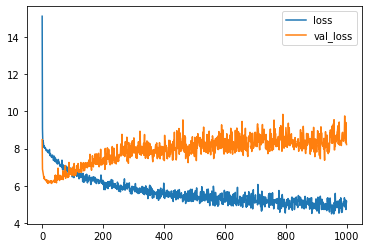

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [40]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
12.796932220458984

Train data evaluation:
11.779842376708984


In [41]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Test True Y,Model Predictions
0,1.163765,2.717293
1,3.437920,1.468162
2,8.782301,1.858539
3,3.890301,1.343222
4,0.876334,1.825742
...,...,...
295,6.408842,2.415372
296,2.999242,2.908684
297,1.497355,2.023311
298,2.550217,5.643655


In [42]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "seconds")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "seconds^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "seconds")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
2.58 seconds

MSE
12.8 seconds^2

RMSE:
3.58 seconds

R-squared:
-0.55

Explained variance score:
-0.34
